In [50]:
for k,v in a.items():
    print('clave:',k, 'valor:',v)

clave: 23 valor: 45654
clave: (3, 'c') valor: 34.34


In [52]:
x,y,z = [1,2,3]

In [55]:
for item in a.items():
    k,v= item
    print(v)

45654
34.34


In [65]:
s= { i % 10 for i in range(100) }

In [88]:
#lo que no esta previsto es que se usen reduces
b=0
def suma(x):
    global b
    b+=x
    return b
[ suma(x) for x in a]

[0, 1, 3, 6, 10, 15, 21, 28, 36, 45]

In [92]:
from functools import reduce
reduce(lambda u,v : u+v, a)

45

In [95]:
from itertools import accumulate
tuple(accumulate(a, lambda u,v: u+v))

(0, 1, 3, 6, 10, 15, 21, 28, 36, 45)

In [112]:
d={ s:i for i,s in accumulate(a, lambda u,v: (v,u[1]+v), initial=(0,0 )) }

In [3]:
#name=Path ( "%s%s%03d.DAT" % (dirname, "OUT", i))
from pathlib import Path
name=Path("/tmp") / "datos.txt"
with name.open ("wt") as Foutput:
    for idat in range(0, 5):
        print(idat, idat**2, file=Foutput)


In [7]:
!cat /tmp/datos.txt

0 0
1 1
2 4
3 9
4 16


In [6]:
with name.open("rt") as F:
    while True:
        try:
            linea=next(F)
        except StopIteration:
            break
        print(list(linea))

['0', ' ', '0', '\n']
['1', ' ', '1', '\n']
['2', ' ', '4', '\n']
['3', ' ', '9', '\n']
['4', ' ', '1', '6', '\n']


In [8]:
with name.open("rt") as F:
    while True:
        linea=F.readline()
        if len(linea) == 0 : break
        print(list(linea))

['0', ' ', '0', '\n']
['1', ' ', '1', '\n']
['2', ' ', '4', '\n']
['3', ' ', '9', '\n']
['4', ' ', '1', '6', '\n']


In [9]:
with name.open("rt") as F:
    for linea in F:
        print(list(linea))

['0', ' ', '0', '\n']
['1', ' ', '1', '\n']
['2', ' ', '4', '\n']
['3', ' ', '9', '\n']
['4', ' ', '1', '6', '\n']


In [23]:
import numpy as np
import timeit
a = np.random.rand(10000)
import math
def f(x):
    return math.sqrt(x)
g= lambda x: math.sqrt(x)
h= np.frompyfunc(math.sqrt,1,1) #puede ser cualquiera, no solo de la libreria
v= np.vectorize(math.sqrt)

In [35]:
%%timeit
h(a)  #pero son pyobject, no permite especificar tipi

1.13 ms ± 4.49 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [32]:
%%timeit
v(a)

1.43 ms ± 8.32 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [33]:
%%timeit
np.fromiter(map(math.sqrt,a),dtype=float)

1.59 ms ± 1.96 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [34]:
%%timeit
np.sqrt(a)

45.3 µs ± 169 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [36]:
b=list(a)
b[:3]

[0.7245211256372979, 0.7912316713313092, 0.3426222597312184]

In [37]:
%%timeit
map(math.sqrt,b)

237 ns ± 10.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [39]:
%%timeit
a[:]=np.fromiter(map(math.sqrt,a),dtype=float)

1.62 ms ± 13.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [1]:
import scipy as sp
import numpy as np
from scipy import integrate

In [3]:
k=0.04
a=0.01
def dSIR(t,sir):
    #aqui podriamos simular medidas a base de poner k dependiendo de t
    global k
    global a
    s,i,r = sir
    ds = - k * s * i
    dr = a * i
    di = - ds - dr
    return ds, di, dr

In [4]:
k=0.3
a=0.1
result=integrate.solve_ivp(dSIR,(0,365),(1.0,0.000001,0.0),
method='RK45',
t_eval=np.linspace(0,365,200))

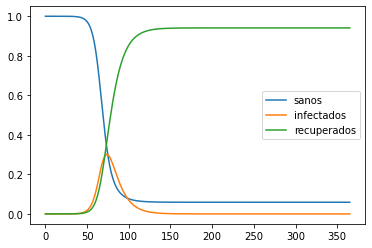

In [6]:
import matplotlib.pyplot as plt
plt.plot(result.t, result.y.T) #mirad el error si no se traspone
plt.legend(['sanos','infectados','recuperados'])

In [7]:
#ver https://github.com/arivero/CursoPythonFis/blob/main/ejemplos/integracionScipy.ipynb para el ejemplo completo

In [14]:
from pathlib import Path
name=Path("datos.txt") 

In [15]:
name

PosixPath('datos.txt')

In [16]:
with name.open ("wt") as Foutput:
    for idat in range(0, 5):
        print(idat, idat**2, file=Foutput)

In [17]:
!ls

2021-10-19.ipynb  2021-10-20.ipynb  datos.txt  Miercoles.ipynb


In [18]:
!cat datos.txt

0 0
1 1
2 4
3 9
4 16


In [26]:
with name.open("rt") as F:
    for linea in F:
        print(linea,linea.split())
        linv=linea.split()
        u = int(linv[0])
        v = float(linv[1])
        print([u,v])

0 0
 ['0', '0']
[0, 0.0]
1 1
 ['1', '1']
[1, 1.0]
2 4
 ['2', '4']
[2, 4.0]
3 9
 ['3', '9']
[3, 9.0]
4 16
 ['4', '16']
[4, 16.0]


In [27]:
np.loadtxt(name)

array([[ 0.,  0.],
       [ 1.,  1.],
       [ 2.,  4.],
       [ 3.,  9.],
       [ 4., 16.]])

In [29]:
x=np.loadtxt(name,dtype=int)
x.shape,x.dtype

((5, 2), dtype('int64'))

In [40]:
with name.open("rt") as F:
    for linea in F:
        print(linea) #se puede poner otro separador si se quiere
        for i,k in enumerate(linea.split()):
            f=float(k)
            print (i,f)
        print("====")
        

0 0

0 0.0
1 0.0
====
1 1

0 1.0
1 1.0
====
2 4

0 2.0
1 4.0
====
3 9

0 3.0
1 9.0
====
4 16

0 4.0
1 16.0
====


In [42]:
with name.open("rt") as F:
    for linea in F:
        print(linea) #se puede poner otro separador si se quiere
        print( [float (x) for x in linea.split()])
        # print( [t (x) for t,x in zip([int,float],linea.split()])
        print("====")
        

0 0

[0.0, 0.0]
====
1 1

[1.0, 1.0]
====
2 4

[2.0, 4.0]
====
3 9

[3.0, 9.0]
====
4 16

[4.0, 16.0]
====


In [50]:
%run ../planetas/N_p_numpy.py

#     t        T           V             E_t 



KeyboardInterrupt: 